# Imports

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Functions

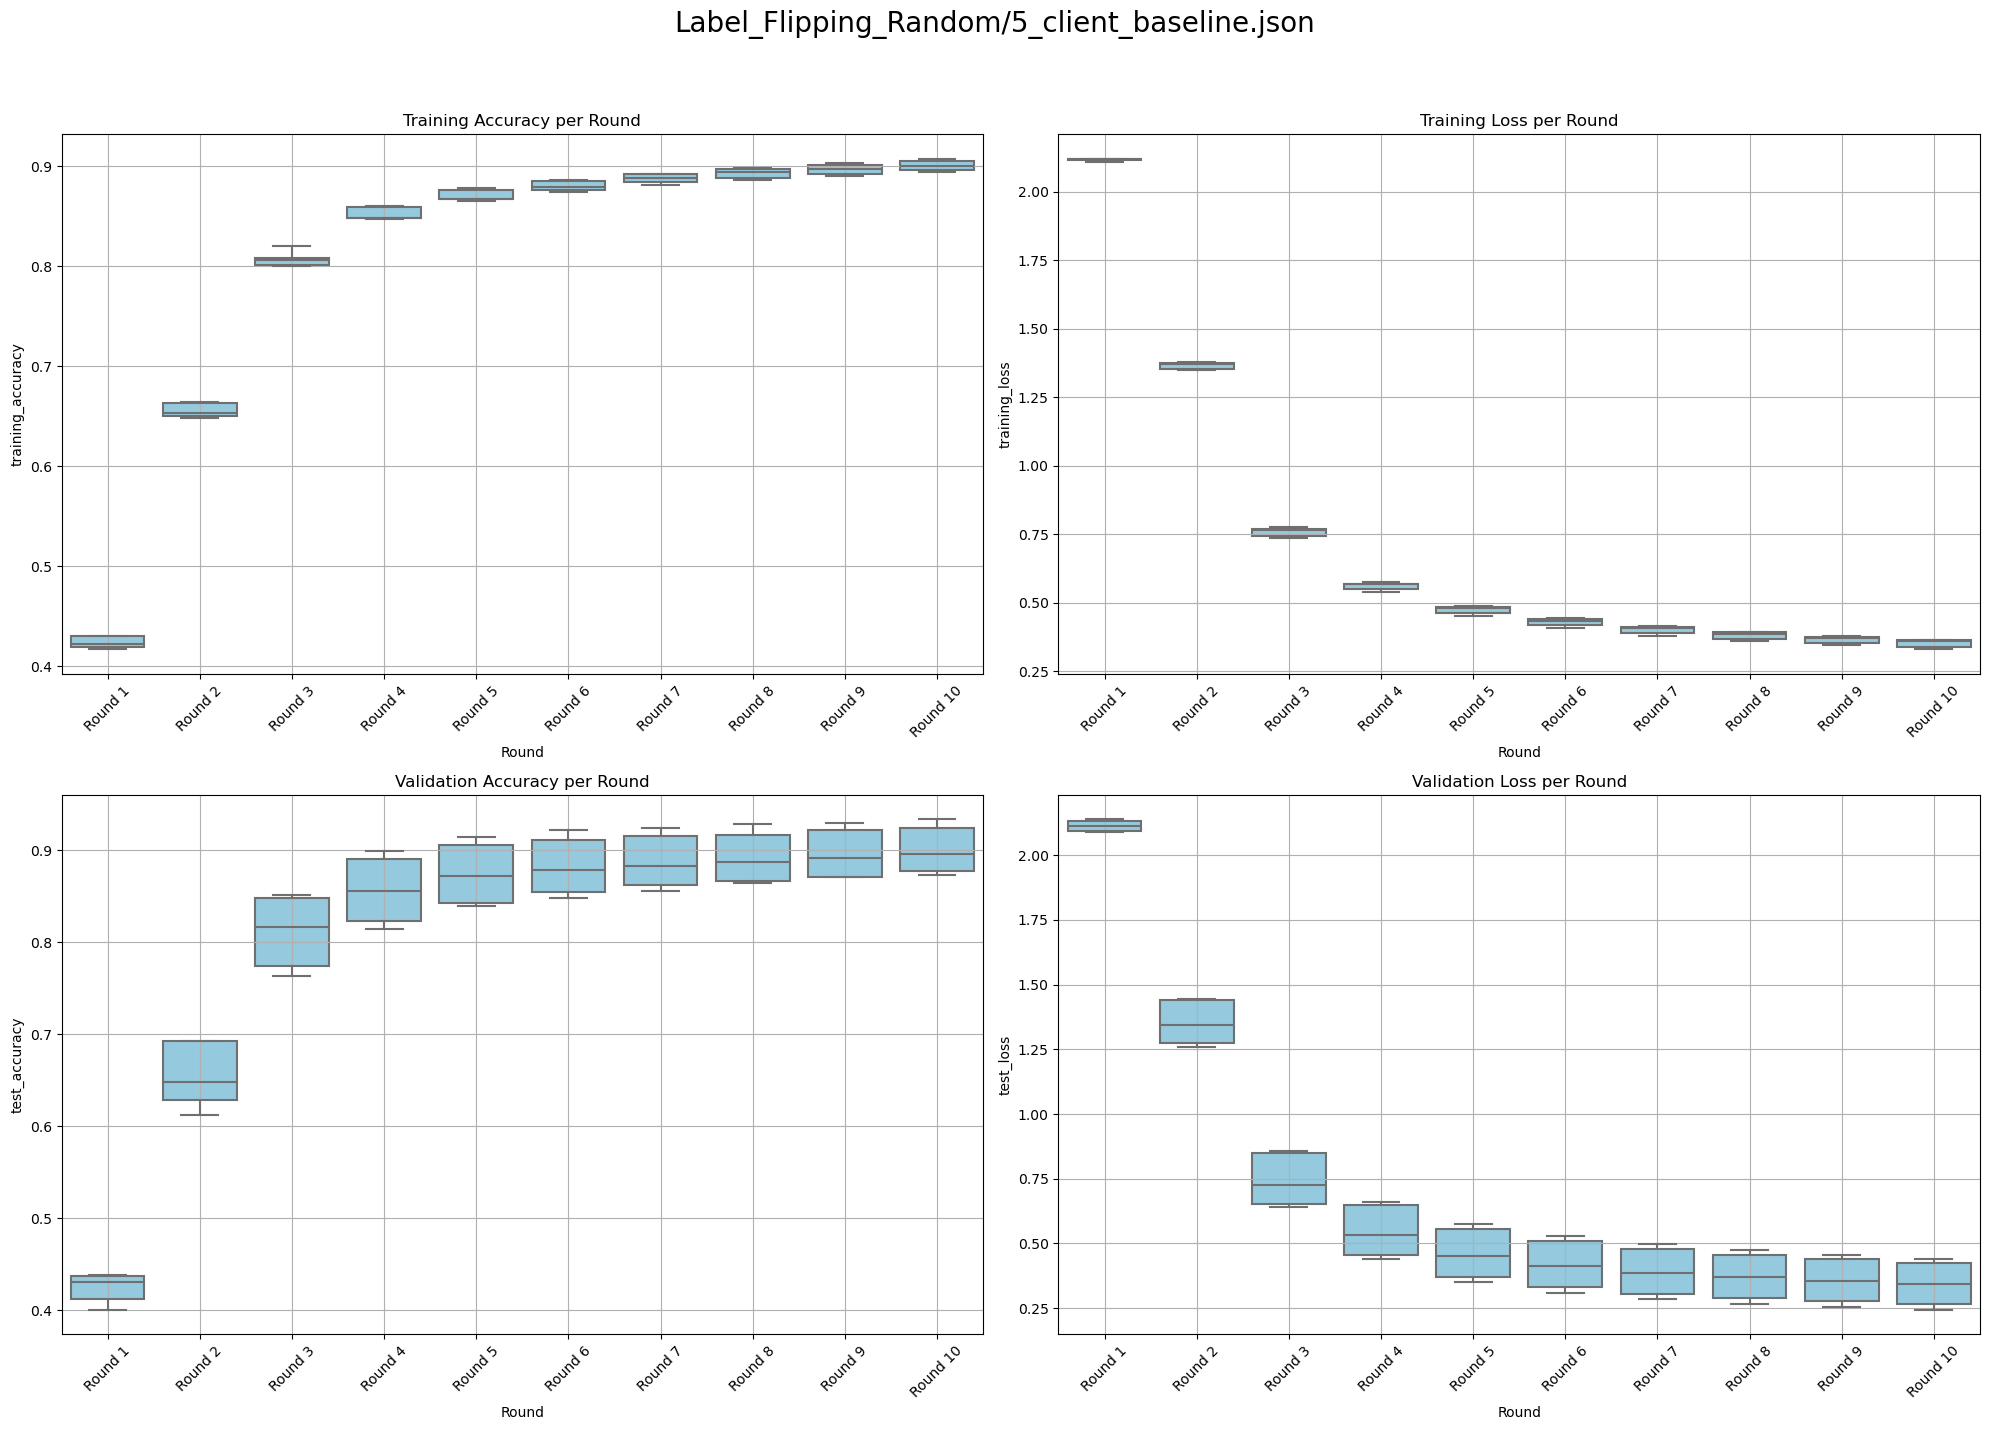

In [14]:
# Load the JSON file
root = 'Label_Flipping_Random/'
file = '5_client_baseline.json'

file_path = root+file


with open(file_path, 'r') as file:
    data = json.load(file)

# Extracting relevant data from each record
extracted_data = []
for record in data:
    client_name = record['sender']['name']
    correlation_id = record['correlationId']
    training_info = json.loads(record['data'])
    extracted_data.append({
        'client': client_name,
        'correlationId': correlation_id,
        'training_loss': training_info['training_loss'],
        'training_accuracy': training_info['training_accuracy'],
        'test_loss': training_info['test_loss'],
        'test_accuracy': training_info['test_accuracy']
    })

# Creating a DataFrame from the extracted data
df = pd.DataFrame(extracted_data)

# Creating a mapping of correlationId to readable round numbers
unique_correlation_ids = df['correlationId'].unique()
round_mapping = {correlation_id: f'Round {i+1}' for i, correlation_id in enumerate(unique_correlation_ids)}

# Applying the mapping to the DataFrame
df['Round'] = df['correlationId'].map(round_mapping)

# Initializing the aggregated data dictionary with lists for each metric
aggregated_data = {
    'Round': [],
    'training_accuracy': [],
    'training_loss': [],
    'test_accuracy': [],
    'test_loss': []
}

# Aggregating data for each round
for round_label in df['Round'].unique():
    round_data = df[df['Round'] == round_label]
    aggregated_data['Round'].extend([round_label] * len(round_data))
    aggregated_data['training_accuracy'].extend(round_data['training_accuracy'])
    aggregated_data['training_loss'].extend(round_data['training_loss'])
    aggregated_data['test_accuracy'].extend(round_data['test_accuracy'])
    aggregated_data['test_loss'].extend(round_data['test_loss'])

# Converting aggregated data into a DataFrame for plotting
df_aggregated = pd.DataFrame(aggregated_data)

# Plotting the boxplots with one box per round
plt.figure(figsize=(20, 15))

# Training Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(x='Round', y='training_accuracy', data=df_aggregated, color='skyblue')
plt.title('Training Accuracy per Round')
plt.xticks(rotation=45)
plt.grid()

# Training Loss
plt.subplot(2, 2, 2)
sns.boxplot(x='Round', y='training_loss', data=df_aggregated, color='skyblue')
plt.title('Training Loss per Round')
plt.xticks(rotation=45)
plt.grid()

# Validation Accuracy
plt.subplot(2, 2, 3)
sns.boxplot(x='Round', y='test_accuracy', data=df_aggregated, color='skyblue')
plt.title('Validation Accuracy per Round')
plt.xticks(rotation=45)
plt.grid()

# Validation Loss
plt.subplot(2, 2, 4)
sns.boxplot(x='Round', y='test_loss', data=df_aggregated, color='skyblue')
plt.title('Validation Loss per Round')
plt.xticks(rotation=45)
plt.grid()


# Add title
plt.suptitle(file_path, fontsize=20)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save image
plt.savefig("one_session_result.png")